In [1]:
# Upload Database
from google.colab import files
uploaded = files.upload()


Saving train.xlsx to train.xlsx


In [ ]:
import tensorflow as tf

# Check if a GPU is available
if tf.test.is_gpu_available():
    print('GPU is available.')
else:
    print('GPU is not available.')

# Your deep learning code using GPU
# ...


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


GPU is available.


In [34]:
import pandas as pd

data = pd.read_excel('train.xlsx')

In [16]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,...,314.0,NaN,0,Transient,38.40,0,0,Check-Out,2019-01-14,1
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,...,1.0,NaN,0,Transient,62.80,0,0,Canceled,2017-10-21,2
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,...,12.0,NaN,0,Transient,110.00,0,0,Canceled,2018-11-25,3
3,Courtyard by Marriott Aberdeen Airport Aberdee...,0,0,2018,October,43,17,1,0,1,...,NaN,200.0,0,Transient,45.00,0,0,Check-Out,2018-10-18,4
4,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,...,16.0,NaN,0,Transient,57.92,0,1,Canceled,2017-08-24,5


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           83293 non-null  object        
 1   is_canceled                     83293 non-null  int64         
 2   lead_time                       83293 non-null  int64         
 3   arrival_date_year               83293 non-null  int64         
 4   arrival_date_month              83293 non-null  object        
 5   arrival_date_week_number        83293 non-null  int64         
 6   arrival_date_day_of_month       83293 non-null  int64         
 7   stays_in_weekend_nights         83293 non-null  int64         
 8   stays_in_week_nights            83293 non-null  int64         
 9   adults                          83293 non-null  int64         
 10  children                        83290 non-null  float64       
 11  ba

<ipython-input-36-c3b03548cb99>:25: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


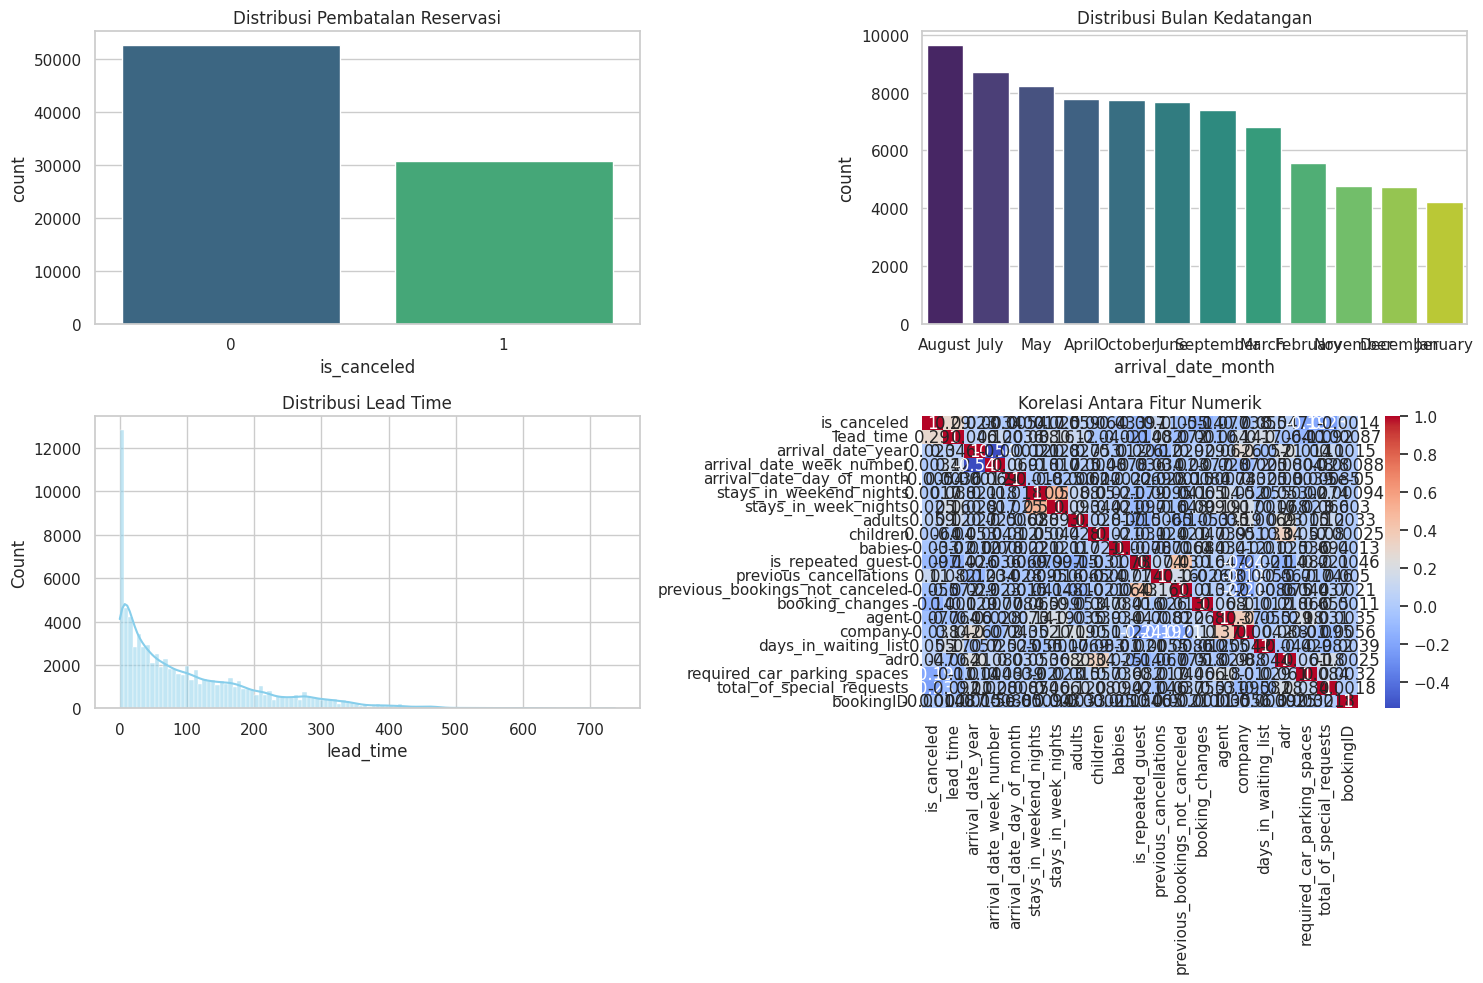

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set tata letak visualisasi
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Visualisasi distribusi kolom "is_canceled"
plt.subplot(2, 2, 1)
sns.countplot(x='is_canceled', data=data, palette='viridis')
plt.title('Distribusi Pembatalan Reservasi')

# Visualisasi distribusi kolom "arrival_date_month"
plt.subplot(2, 2, 2)
sns.countplot(x='arrival_date_month', data=data, order=data['arrival_date_month'].value_counts().index, palette='viridis')
plt.title('Distribusi Bulan Kedatangan')

# Visualisasi distribusi kolom "lead_time"
plt.subplot(2, 2, 3)
sns.histplot(x='lead_time', data=data, kde=True, color='skyblue')
plt.title('Distribusi Lead Time')

# Visualisasi korelasi antara fitur numerik
plt.subplot(2, 2, 4)
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antara Fitur Numerik')

# Tampilkan visualisasi
plt.tight_layout()
plt.show()


In [18]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [19]:
# Mengatasi nilai yang hilang
data['children'].fillna(0, inplace=True)
data['country'].fillna('OT', inplace=True)
data['agent'].fillna(0, inplace=True)
data['company'].fillna(0, inplace=True)


In [20]:
# Konversi fitur kategorikal menjadi numerik (one-hot encoding)
categorical_columns = ['hotel', 'arrival_date_month',
                       'meal', 'country', 'market_segment',
                       'distribution_channel', 'reserved_room_type',
                       'assigned_room_type', 'deposit_type',
                       'customer_type','reservation_status']
data = pd.get_dummies(data, columns=categorical_columns)

In [25]:
# Pisahkan fitur dan target
X = data.drop(['is_canceled', 'reservation_status_date'], axis=1)
y = data['is_canceled']


In [26]:

# Uji Statistik untuk Seleksi Fitur (Chi-square)
chi2_selector = SelectKBest(chi2, k='all')
X_chi2 = chi2_selector.fit_transform(X, y)

In [28]:
from sklearn.feature_selection import RFE


# Pemilihan Fitur Berbasis Model (Recursive Feature Elimination)
rf_classifier = RandomForestClassifier()
rfe_selector = RFE(estimator=rf_classifier, n_features_to_select=5, step=1)
X_rfe = rfe_selector.fit_transform(X, y)


In [30]:
selected_features_indices = rfe_selector.get_support()
selected_features = X.columns[selected_features_indices]
print("Fitur yang Terpilih:")
print(selected_features)



Fitur yang Terpilih:
Index(['deposit_type_No Deposit', 'deposit_type_Non Refund',
       'reservation_status_Canceled', 'reservation_status_Check-Out',
       'reservation_status_No-Show'],
      dtype='object')


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Pisahkan data menjadi data latih dan data uji
X_selected = X[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Inisialisasi model RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model
rf_classifier.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = rf_classifier.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 1.0000
Confusion Matrix:
[[10472     0]
 [    0  6187]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10472
           1       1.00      1.00      1.00      6187

    accuracy                           1.00     16659
   macro avg       1.00      1.00      1.00     16659
weighted avg       1.00      1.00      1.00     16659

